#### To download the dataset, click <a href = 'https://www.kaggle.com/datasets/chetankv/dogs-cats-images/download?datasetVersionNumber=1'>here</a>

### import necessary libraries 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.metrics import confusion_matrix
import glob

### To do the project in Google Colab, use the below code to mount your drive.

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
cats = glob.glob('cat and dog/training_set/cats/*.jpg')
dogs = glob.glob('cat and dog/training_set/dogs/*.jpg')

In [ ]:
cats_test = glob.glob('cat and dog/test_set/cats/*.jpg')
dogs_test = glob.glob('cat and dog/test_set/cats/*.jpg')

In [ ]:
print("Number of images in Training are, Cats:",len(cats),",Dogs:",len(dogs))
print("Number of images in Testing are, Cats:",len(cats_test),",Dogs:",len(dogs_test))

Number of images in Training are, Cats: 108 ,Dogs: 107
Number of images in Testing are, Cats: 38 ,Dogs: 38


In [ ]:
print("Datatype of Training set, Cats:", type(cats),",Dogs:",type(dogs))
print("Datatype of Testing set, Cats:", type(cats_test),",Dogs:",type(dogs_test))

Datatype of Training set, Cats: <class 'list'> ,Dogs: <class 'list'>
Datatype of Testing set, Cats: <class 'list'> ,Dogs: <class 'list'>


In [ ]:
image = []
label = []

for i in cats:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

    
for i in dogs:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

In [ ]:
image_test = []
label_test = []


for i in cats_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(0)

for i in dogs_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(1)

In [ ]:
image, label = shuffle(image,label, random_state = 100)

In [ ]:
image_test, label_test = shuffle(image_test,label_test, random_state = 100)

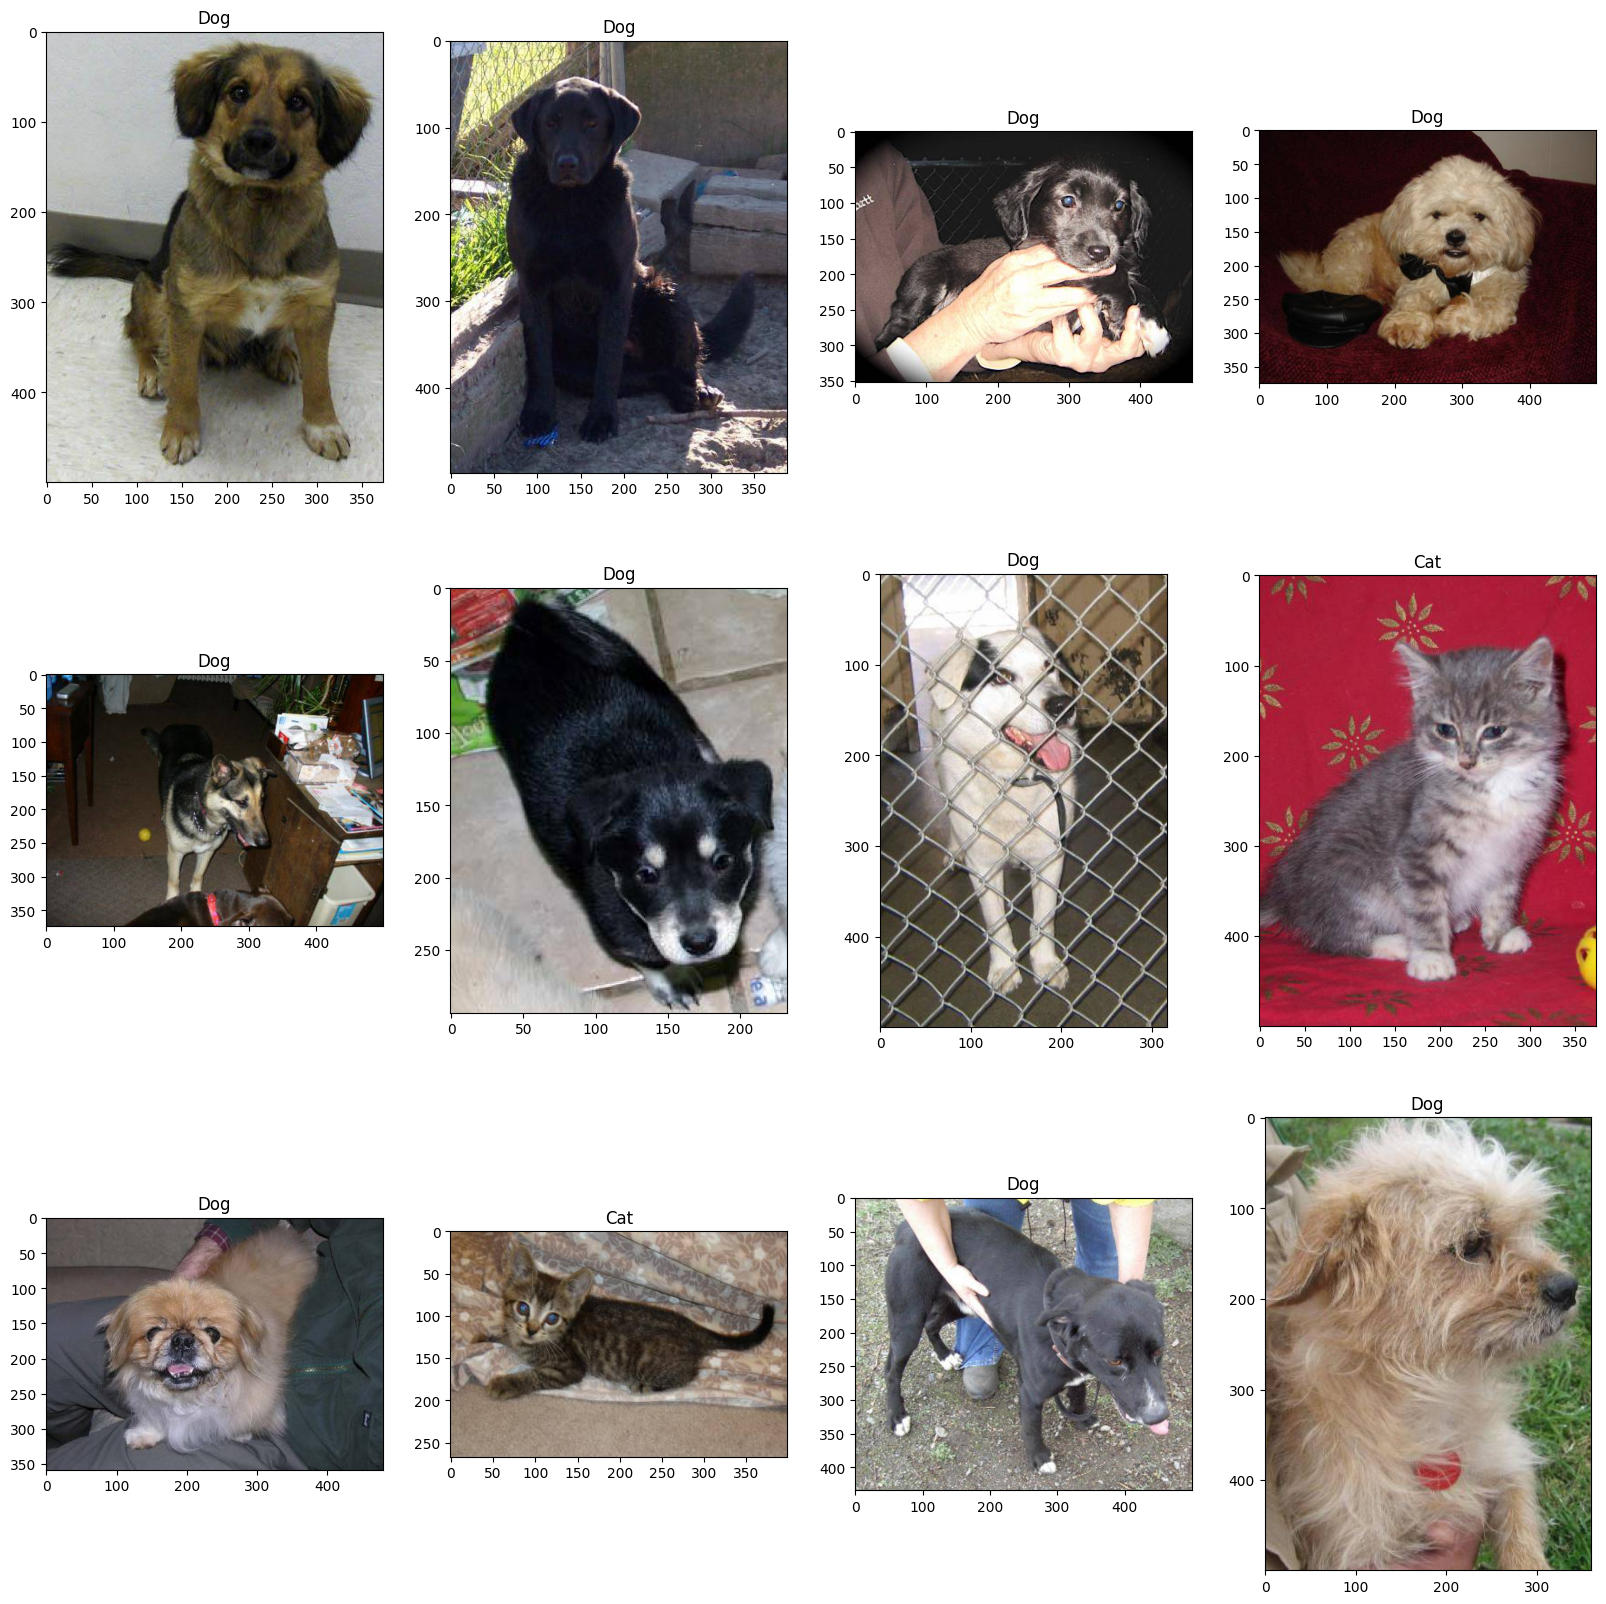

In [ ]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    if label[i] == 1:
        plt.title('Dog')
    else:
        plt.title('Cat')

In [ ]:
X_train = []

for i in image:
    X_train.append(resize(i,(64,64,3)))
    
X_train = np.array(X_train)

In [ ]:
X_test = []

for i in image_test:
    X_test.append(resize(i,(64,64,3)))
    
X_test = np.array(X_test)

In [ ]:
print(type(X_train))
print(type(label))

<class 'numpy.ndarray'>
<class 'list'>


In [ ]:
y_train = np.array(label)
y_test = np.array(label_test)

#### Display some of the pictures

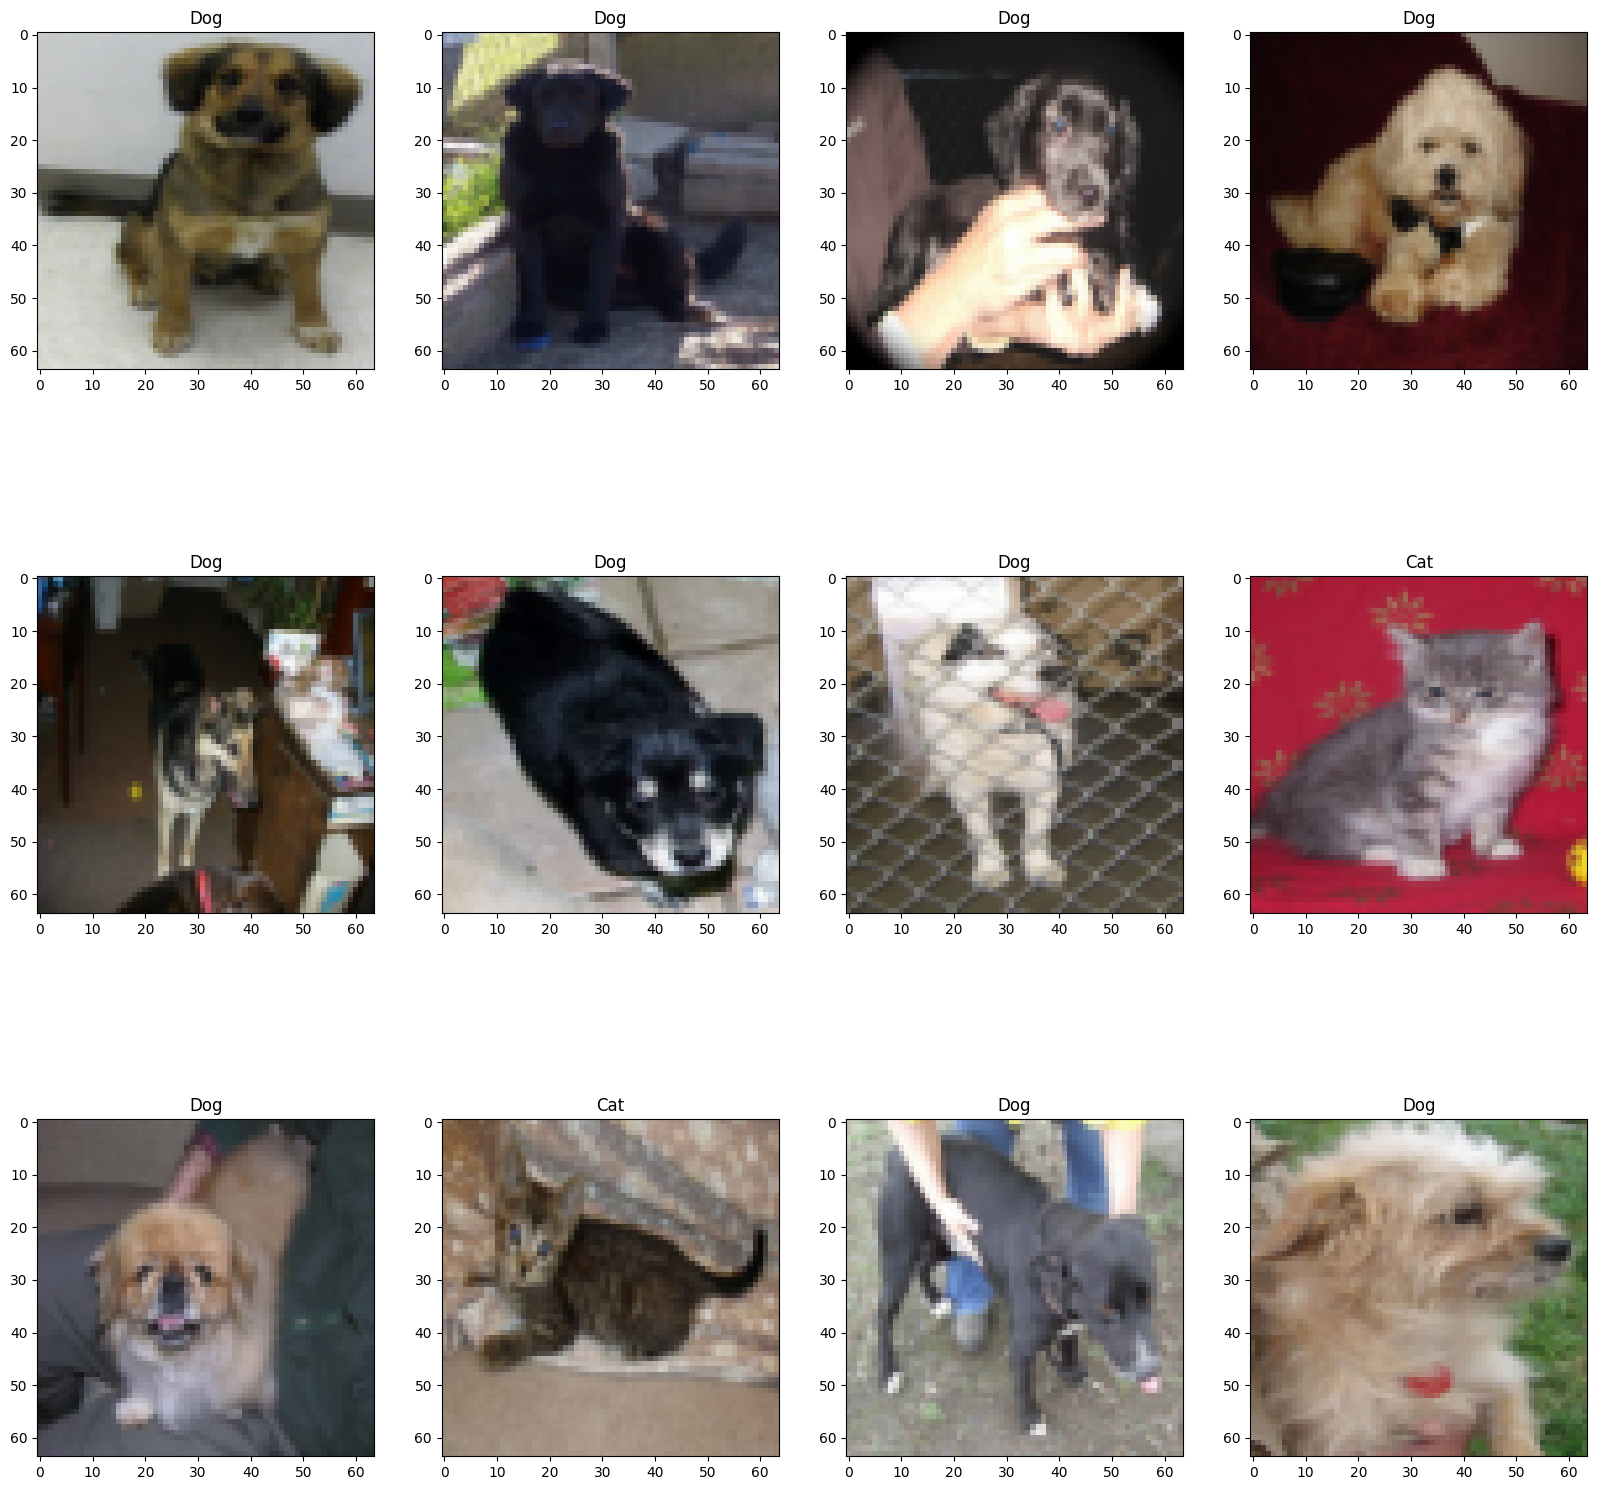

In [ ]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i])
    if y_train[i] == 1:
        plt.title('Dog')
    else:
        plt.title('Cat')

In [ ]:
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
X_train.shape

(215, 64, 64, 3)

In [ ]:
y_train.shape

(215,)

#### Create the model

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (64, 64, 3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

#### Compile it

In [ ]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

#### Check the summary of the model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 64)                4

#### Train the model

In [ ]:
model.fit(X_train,y_train, epochs=30, steps_per_epoch=3, validation_split=0.1)

Epoch 1/30
3/3 [==============================] - 2s 342ms/step - loss: 0.7247 - accuracy: 0.5285 - val_loss: 0.6549 - val_accuracy: 0.6818
Epoch 2/30
3/3 [==============================] - 1s 244ms/step - loss: 0.6950 - accuracy: 0.4870 - val_loss: 0.6887 - val_accuracy: 0.5909
Epoch 3/30
3/3 [==============================] - 1s 377ms/step - loss: 0.6763 - accuracy: 0.6114 - val_loss: 0.7636 - val_accuracy: 0.3182
Epoch 4/30
3/3 [==============================] - 1s 395ms/step - loss: 0.6702 - accuracy: 0.5181 - val_loss: 0.7359 - val_accuracy: 0.3182
Epoch 5/30
3/3 [==============================] - 1s 380ms/step - loss: 0.6532 - accuracy: 0.5492 - val_loss: 0.7120 - val_accuracy: 0.4091
Epoch 6/30
3/3 [==============================] - 1s 381ms/step - loss: 0.6359 - accuracy: 0.7098 - val_loss: 0.7242 - val_accuracy: 0.4545
Epoch 7/30
3/3 [==============================] - 1s 227ms/step - loss: 0.6165 - accuracy: 0.7513 - val_loss: 0.7193 - val_accuracy: 0.4545
Epoch 8/30
3/3 [====

#### Evaluate

In [ ]:
model.evaluate(X_train, y_train)

7/7 [==============================] - 0s 34ms/step - loss: 0.2421 - accuracy: 0.9488


[0.24207402765750885, 0.9488372206687927]

#### predicting the value

In [ ]:
prediction = model.predict(X_test)

3/3 [==============================] - 0s 22ms/step


In [ ]:
prediction[:5]

array([[0.40918893],
       [0.12869963],
       [0.48553988],
       [0.49311993],
       [0.03571623]], dtype=float32)

In [ ]:
pred = []

for i in prediction:
    if i > 0.5:
        pred.append(0)
    else:
        pred.append(1)

In [ ]:
pred

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0]

#### Plot the Prediction with Proper labels

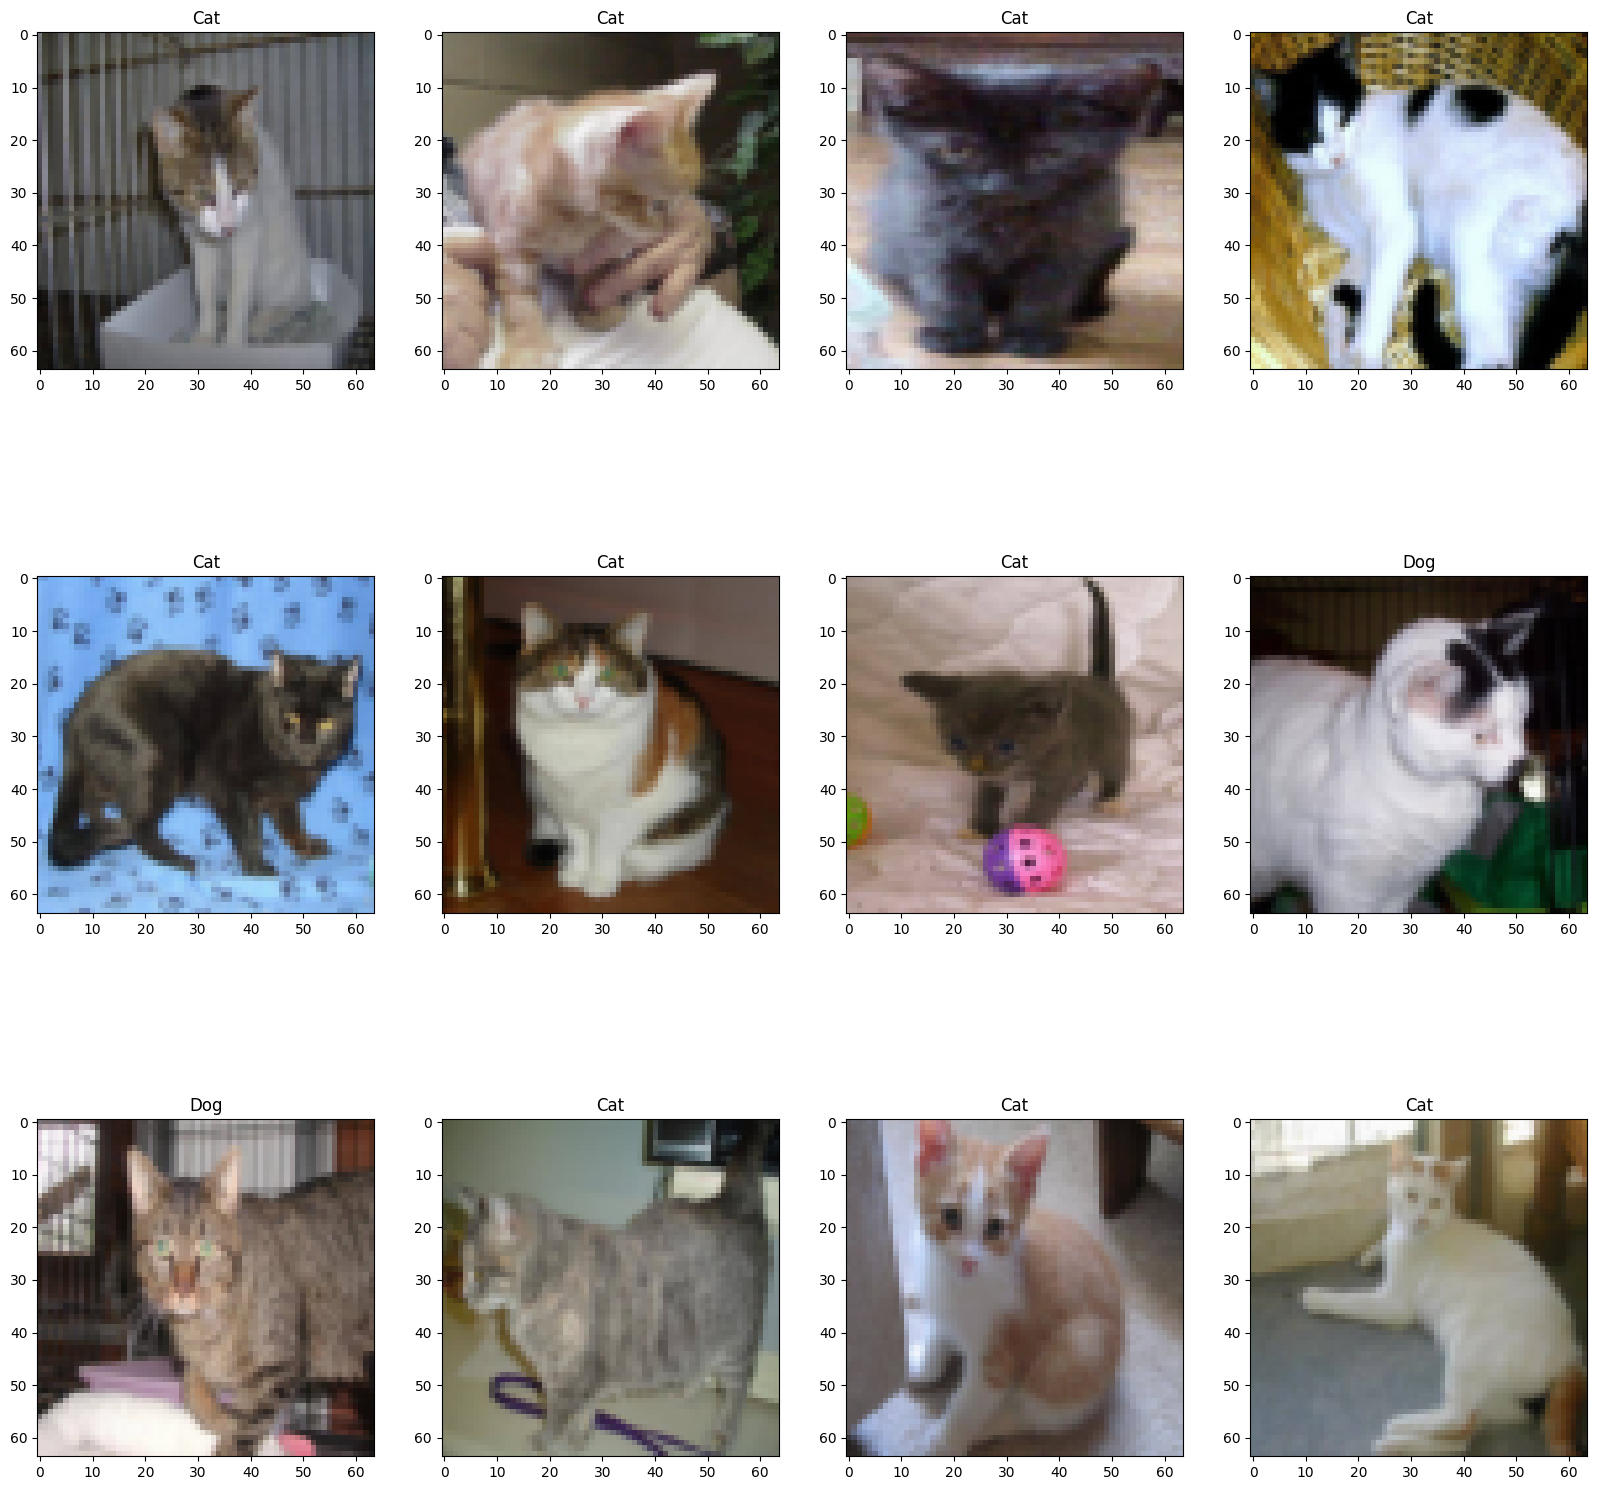

In [ ]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[i])
    if pred[i] == 1:
        plt.title('Cat')
    else:
        plt.title('Dog')

#### Plot the confusion matrix of the prediction

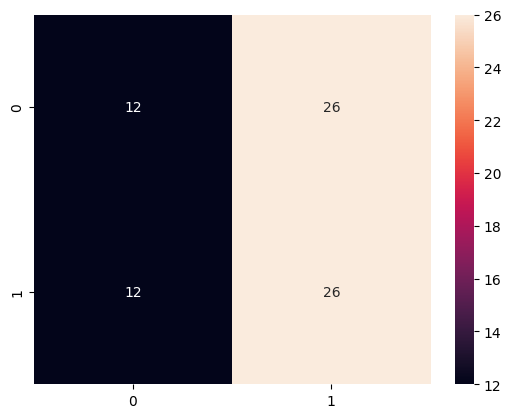

In [ ]:
sns.heatmap(confusion_matrix(y_test,pred), annot = True)
plt.show()